# 1.  Habilitar Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Importar librerias necesarias

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# Cargar video de Google drive con opencv

In [0]:
videoentrada = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_Vision/Images/Shopping_Mall.mp4')


# Analizar video

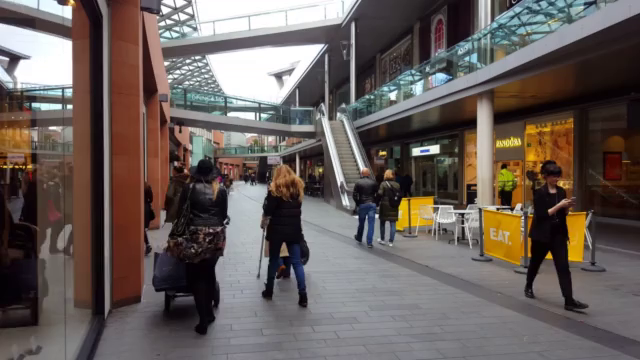

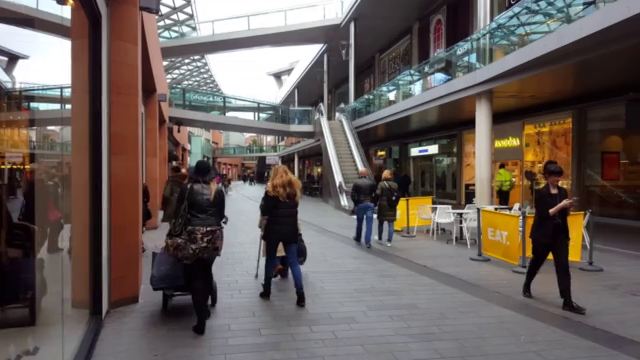

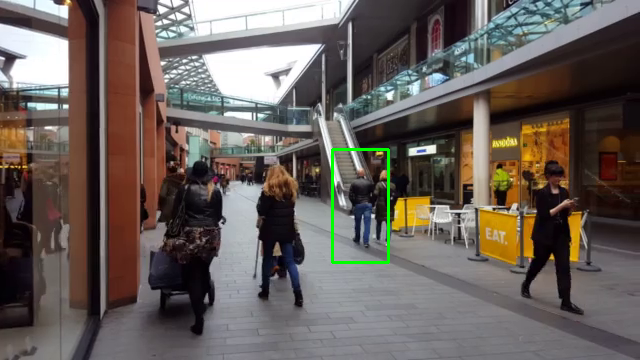

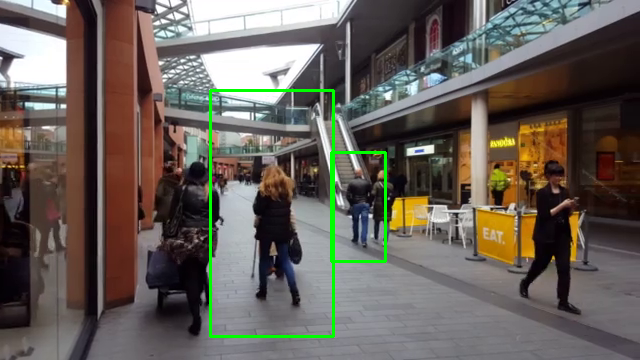

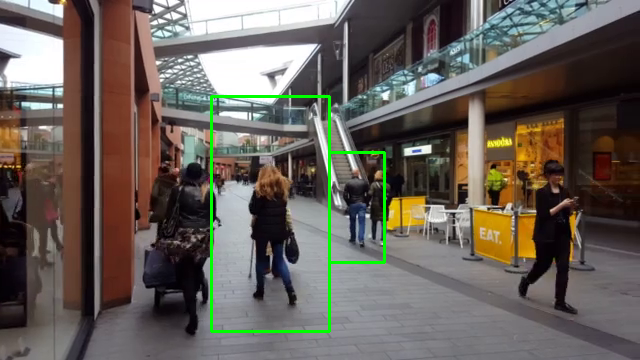

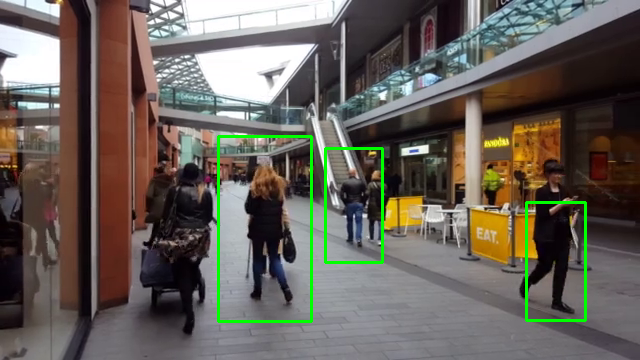

In [8]:
#video que vamos a analizar
video = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_Vision/Images/Shopping_Mall.mp4')
#clasificador haar
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_Vision/Python_files/HaarCascade/haarcascade_fullbody.xml')

for x in range(6):
  videoentrada.set(1,x);   
  #ret: retorno (true si es frame se lee correctamente)
  ret, frame = videoentrada.read()
  #convertimos el frame a gris
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  #detectamos las caras en el frame
  faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
  for (x, y, w, h) in faces:
    #dibujamos rectángulos verdes alrededor de las caras
    cv2.rectangle(frame,(x,y),(x+w, y+h),(0, 255, 0),2)
  cv2_imshow(frame)

# Instalar libreria para medir la ejecución

In [9]:
pip install pyprind

In [0]:
import sys
import time          #  calcular tiempo (en este caso tiempo de descarga de archivo)
import pyprind
#funcion para ver el avance de procesos en background
def reporthook(step, total_step):
    global start_time
    if step == 0:
        start_time = time.time()
        return
    duration = time.time() - start_time
    speed = total_step / (1024.**2 * duration)
    percent = step *100 /total_step
    sys.stdout.write("\r%d pasos | %d frames -> %%.2f frames | %d segundos transcurrido" %
                    (step, percent, duration))
    sys.stdout.flush()



In [11]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/IA/Computer_Vision/Python_files/HaarCascade/haarcascade_fullbody.xml')
#video que analizaremos
videoentrada = cv2.VideoCapture('/content/drive/My Drive/IA/Computer_Vision/Images/Shopping_Mall.mp4')
#video resultante del análisis, definimos el codec DIVX
codec = cv2.VideoWriter_fourcc(*'DIVX')
# Definimos el fps = 20.0 y el tamaño de cada frame (640x360)
videosalida = cv2.VideoWriter('/content/drive/My Drive/IA/Computer_Vision/Images/Shopping_Mall_haar.avi',
                              codec, 20.0,(640,360))
framenum=0
while (videoentrada.isOpened()):
  ret, frame = videoentrada.read()
  if ret == True:
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    for (x,y,w,h) in faces:
      cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    videosalida.write(frame)
    reporthook(framenum, 1412)
    framenum=framenum+1
  else: break
videoentrada.release()
videosalida.release()


299 pasos | 21 frames -> %.2f frames | 47 segundos transcurrido